# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button. Then continue scrolling until you cannot scroll anymore. The maximum number of images Google Images shows is 700.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>I</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [1]:
from fastai import *
from fastai.vision import *

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [2]:
folder = 'f22'
file   = 'urls_f22.txt'
path   = Path('/Users/WayNoxchi/data/aircraft/')
dest   = path/folder

In [12]:
# folder = 'black'
# file = 'urls_black.txt'

In [3]:
# folder = 'teddys'
# file = 'urls_teddys.txt'

In [4]:
# folder = 'grizzly'
# file = 'urls_grizzly.txt'

In [14]:
# path = Path('data/bears')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

Finally, upload your urls file. You just need to press Upload in your working directory and select your file, then click 'upload' on the right.

![](upload.png)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [3]:
download_images(path/file, dest, max_pics=200)

In [4]:
print(inspect.getsource(download_images))

def download_images(urls:Collection[str], dest:PathOrStr, max_pics:int=1000):
    "Download images listed in text file `urls` to path `dest`, at most `max_pics`"
    urls = open(urls).read().strip().split("\n")[:max_pics]
    dest = Path(dest)
    dest.mkdir(exist_ok=True)
    with ProcessPoolExecutor(max_workers=8) as ex:
        futures = [ex.submit(download_image, url, dest/f"{i:08d}.jpg")
                   for i,url in enumerate(urls)]
        for f in progress_bar(as_completed(futures), total=len(urls)): pass



In [5]:
urls = open(path/file).read().strip().split("\n")[:3]
urls

['https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy',
 'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/f-22_2.jpg.pc-adaptive.full.medium.jpeg',
 'https://upload.wikimedia.org/wikipedia/commons/4/46/Lockheed_Martin_F-22A_Raptor_JSOH.jpg']

In [7]:
url = urls[0]

try: r = download_url(url, dest, overwrite=True, show_progress=False)
except Exception as e: print(f"Error {url} {e}")

Error https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy [Errno 21] Is a directory: '/Users/WayNoxchi/data/aircraft/f22'


In [10]:
str(dest) + '/'

'/Users/WayNoxchi/data/aircraft/f22/'

so this means if `dest` is a string with a forward-slash at the end: this will work.

In [11]:
download_images(path/file, str(dest)+'/', max_pics=200)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2018%2F07%2Fjjjaj2131.jpg%3Fquality%3D85 'content-length'
Error https://c8.alamy.com/comp/K8RR9W/usaf-f22-raptor-K8RR9W.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https%3A%2F%2Fs3.amazonaws.com%2Fthe-drive-staging%2Fmessage-editor%252F1513303510324-f-22-3.jpg 'content-length'
Error http://www.migflug.com/jetflights/wp-content/uploads/2014/05/f-22-raptor.jpg 'content-length'
Error https://c8.alamy.com/comp/C3MP3P/a-lockheed-martin-f22-raptor-fighter-of-the-usaf-C3MP3P.jpg 'content-length'
Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F08%2Ff-22-1.jpg%3Fquality%3D85 'content-length'
Err

and it works! Does this only happen if Pathlib objects are constructed a certain way?

In [13]:
dest2 = Path(str(dest) + '/')

In [15]:
str(dest2)

'/Users/WayNoxchi/data/aircraft/f22'

In [16]:
doc(download_url)

In [17]:
doc(download_images)

Nope, it's really a pathlib thing. Okay I should fix this.

Wait, no that's interesting that makes no sense. `download_images` takes a Path or Str object for `dest`, and I thought this was why it wasn't working when it called `download_url`, but in the code it actually passes the path and filename to it.. hmm

In [19]:
dest

PosixPath('/Users/WayNoxchi/data/aircraft/f22')

In [20]:
download_images(path/file, dest, max_pics=20)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


***what the hell, now the damn thing works??*** I need to restart the kernel and see what happens when I start fresh (below here):

In [12]:
download_images(path/file, dest, max_pics=10)

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [13]:
urls = open(path/file).read().strip().split("\n")[:3]
urls

['https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy',
 'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/f-22_2.jpg.pc-adaptive.full.medium.jpeg',
 'https://upload.wikimedia.org/wikipedia/commons/4/46/Lockheed_Martin_F-22A_Raptor_JSOH.jpg']

In [14]:
download_images(path/file, str(dest)+'/', max_pics=20)

In [16]:
dest

PosixPath('/Users/WayNoxchi/data/aircraft/f22')

In [17]:
download_images(path/file, dest, max_pics=20)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


Does this only work randomly?

In [18]:
download_images(path/file, dest, max_pics=20)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


### Debugging: trying to replicate download issue:

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'f22'
file   = 'urls_f22.txt'
path   = Path('/Users/WayNoxchi/data/aircraft/')
dest   = path/folder

In [3]:
dest

PosixPath('/Users/WayNoxchi/data/aircraft/f22')

In [4]:
# this should either fail silently or throw a BrokenProcessPool error
download_images(path/file, dest, max_pics=20)

In [5]:
# I really don't think this does anything
urls = open(path/file).read().strip().split("\n")[:3]
urls

['https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy',
 'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/f-22_2.jpg.pc-adaptive.full.medium.jpeg',
 'https://upload.wikimedia.org/wikipedia/commons/4/46/Lockheed_Martin_F-22A_Raptor_JSOH.jpg']

In [41]:
# does this run now? (nope)
download_images(path/file, dest, max_pics=20)

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

Oh I get it.... that's weird, and may be something the hardcore SWE's helping fastai have some insight into: the download code only works after I attempt to run the function called by the ProcessPoolExecutor: (actually called by the function `download_image` called by ...):

In [42]:
# this will fail bc `dest` isn't the filename as it should be, but the folder
# that doesn't matter, because after this is run, `download_images` will work:
url = urls[0]
try: r = download_url(url, dest, overwrite=True, show_progress=False)
except Exception as e: print(f"Error {url} {e}")

Error https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy [Errno 21] Is a directory: '/Users/WayNoxchi/data/aircraft/f22'


In [43]:
# this will work.
download_images(path/file, dest, max_pics=20)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


Gotcha. Since I don't know anything about multi-threading yet, I'm going to raise this as an issue.

---

Good! Let's take a look at some of our pictures then.

In [6]:
classes = ['teddys','grizzly','black']

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

teddys


grizzly


black


## View data

In [21]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)

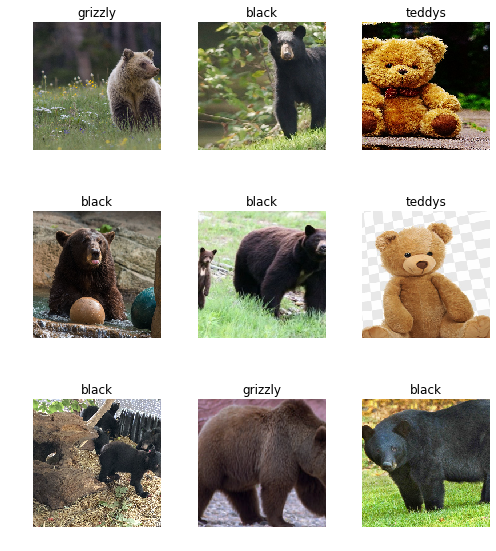

In [22]:
data.show_batch(rows=3, figsize=(7,8))

In [23]:
data.classes, data.c

(['black', 'grizzly', 'models', 'teddys'], 4)

## Train model

In [37]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [38]:
learn.fit_one_cycle(4)

Total time: 00:49
epoch  train_loss  valid_loss  error_rate
1      1.036307    0.318878    0.048611    (00:12)
2      0.552535    0.138572    0.055556    (00:12)
3      0.400240    0.166448    0.055556    (00:12)
4      0.309318    0.158356    0.062500    (00:12)



In [39]:
learn.unfreeze()

In [ ]:
learn.lr_find(stop_div=False)

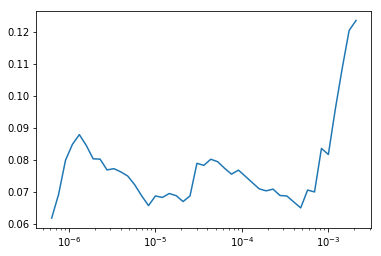

In [29]:
learn.recorder.plot()

In [40]:
learn.save('stage-1')

In [42]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:25
epoch  train_loss  valid_loss  error_rate
1      0.096706    0.144553    0.055556    (00:11)
2      0.087185    0.146705    0.055556    (00:13)



In [43]:
learn.save('stage-2')

## Interpretation

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

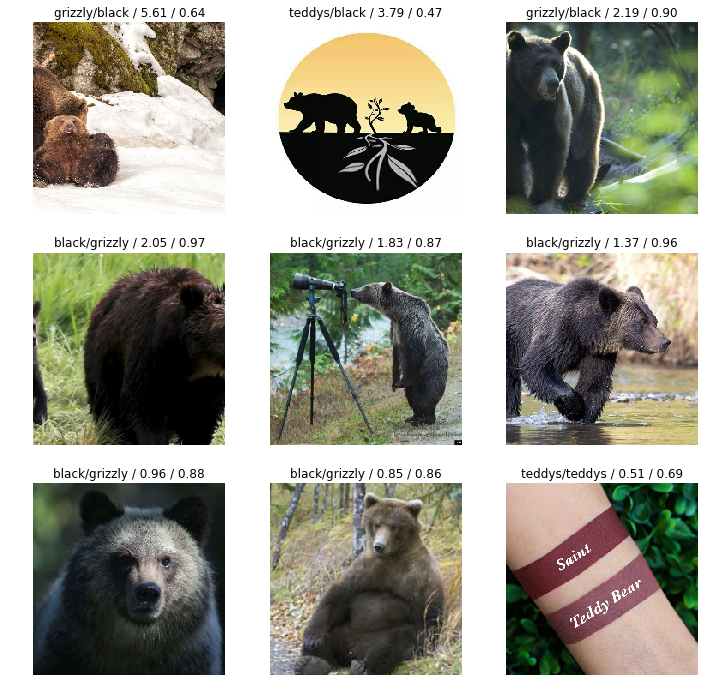

In [46]:
interp.plot_top_losses(9)

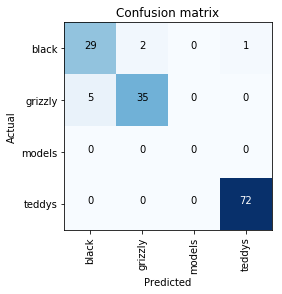

In [48]:
interp.plot_confusion_matrix()

## Optional: Prune images

As you can seem the images come in all forms. Removing incorrectly labeled images can sometimes help your accuracy a little bit.